In [1]:
import sys
sys.path.append("..")

In [2]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [3]:
results_QNN = load_feather_folder_as_pd("../data/results/DE_2_29")
results_QK = load_feather_folder_as_pd("../data/results/DE_3_30")

['../data/results/DE_2_29\\0.feather', '../data/results/DE_2_29\\1.feather', '../data/results/DE_2_29\\10.feather', '../data/results/DE_2_29\\11.feather', '../data/results/DE_2_29\\12.feather', '../data/results/DE_2_29\\13.feather', '../data/results/DE_2_29\\14.feather', '../data/results/DE_2_29\\15.feather', '../data/results/DE_2_29\\16.feather', '../data/results/DE_2_29\\17.feather', '../data/results/DE_2_29\\18.feather', '../data/results/DE_2_29\\19.feather', '../data/results/DE_2_29\\2.feather', '../data/results/DE_2_29\\20.feather', '../data/results/DE_2_29\\21.feather', '../data/results/DE_2_29\\22.feather', '../data/results/DE_2_29\\23.feather', '../data/results/DE_2_29\\24.feather', '../data/results/DE_2_29\\25.feather', '../data/results/DE_2_29\\26.feather', '../data/results/DE_2_29\\27.feather', '../data/results/DE_2_29\\3.feather', '../data/results/DE_2_29\\4.feather', '../data/results/DE_2_29\\5.feather', '../data/results/DE_2_29\\6.feather', '../data/results/DE_2_29\\7.fea

c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

0.43408703804016113
['../data/results/DE_3_30\\0.feather', '../data/results/DE_3_30\\1.feather', '../data/results/DE_3_30\\10.feather', '../data/results/DE_3_30\\11.feather', '../data/results/DE_3_30\\12.feather', '../data/results/DE_3_30\\13.feather', '../data/results/DE_3_30\\14.feather', '../data/results/DE_3_30\\15.feather', '../data/results/DE_3_30\\16.feather', '../data/results/DE_3_30\\17.feather', '../data/results/DE_3_30\\18.feather', '../data/results/DE_3_30\\19.feather', '../data/results/DE_3_30\\2.feather', '../data/results/DE_3_30\\20.feather', '../data/results/DE_3_30\\21.feather', '../data/results/DE_3_30\\22.feather', '../data/results/DE_3_30\\23.feather', '../data/results/DE_3_30\\3.feather', '../data/results/DE_3_30\\4.feather', '../data/results/DE_3_30\\5.feather', '../data/results/DE_3_30\\6.feather', '../data/results/DE_3_30\\7.feather', '../data/results/DE_3_30\\8.feather', '../data/results/DE_3_30\\9.feather']
0.06624889373779297


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

In [17]:
results_QK

,f_sol,optimal_alpha,mse,method,loss_name,domain,executor_type,encoding_circuit,num_qubits,num_layers,mse_history,loss_history,epochs
0,"[1.0615876229633834, 0.6187114341645277, 0.313...","[11.625164846698357, 93.69820324677283, -12.42...",0.025568,FQK,paper,"[0.0, 0.04736842105263158, 0.09473684210526316...",pennylane,HEEAndChebyshevTower,2,1,"[85.43254413586004, 41.0846101899768, 39.72411...","[10304.318882131583, 9186.384164984356, 9132.5...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[1.0028775336415197, 0.504771776875724, -0.336...","[-3.6547609717141722, -65.86852333838002, 213....",0.238876,PQK,paper,"[0.0, 0.04736842105263158, 0.09473684210526316...",pennylane,HEEAndChebyshevTower,2,1,"[32.70652962284073, 24.930689061137695, 14.619...","[6607.499361984907, 5873.323728179892, 5552.17...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,"[1.0000021091378892, 0.5375023090616087, -0.25...","[-0.3278889876201357, 1.3784197284800983, 0.43...",0.000057,FQK,paper,"[0.0, 0.04736842105263158, 0.09473684210526316...",pennylane,HEEAndChebyshevTower,7,1,"[13.395046333049995, 3.073992336365677, 1.8533...","[2304.232895808982, 1379.3605868440277, 1240.4...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,"[1.000015266731008, 0.5295271929005665, -0.268...","[0.7180747822006598, 0.31912687621130637, -0.0...",0.002658,PQK,paper,"[0.0, 0.04736842105263158, 0.09473684210526316...",pennylane,HEEAndChebyshevTower,7,1,"[4.555363574849784, 1.4654942127345267, 0.2384...","[987.1134098339854, 577.0794960080285, 496.049...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,"[-2.238726146613555, -1.874792797865723, -1.59...","[-18.404007274460124, -56.01043892414771, 17.5...",0.14694,FQK,log_ode,"[0.01, 0.056842105263157895, 0.103684210526315...",pennylane,HEEAndChebyshevTower,2,1,"[119.65316957915222, 55.36369676446386, 31.773...","[2495.818209002316, 2466.4886296156446, 2237.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,"[-3.4313890394613438, -2.603928074748005, -2.2...","[-40.200340123047276, 23.265272338897706, 193....",4.258533,PQK,log_ode,"[0.01, 0.056842105263157895, 0.103684210526315...",pennylane,HEEAndChebyshevTower,2,1,"[55.80104336267395, 45.33839602053778, 29.2836...","[994.365036865154, 742.7030963064786, 477.0507...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,"[-2.87168667154641, -2.24446248273183, -1.8723...","[-29.12694199089186, -4320.5226171113145, 8857...",0.053076,FQK,log_ode,"[0.01, 0.056842105263157895, 0.103684210526315...",pennylane,HEEAndChebyshevTower,3,1,"[81.93568699543053, 74.56855614922668, 49.8221...","[1578.0014758284315, 1465.2624121967217, 1294....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
7,"[-4.592066481776087, -2.64545274363644, -2.433...","[-71.5758855689776, 108.05842976404584, -115.7...",4.314167,PQK,log_ode,"[0.01, 0.056842105263157895, 0.103684210526315...",pennylane,HEEAndChebyshevTower,3,1,"[33.14695248756853, 19.00419592894535, 14.0710...","[695.6803863186954, 508.41438941899645, 447.22...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
8,"[-3.0541649621535534, -2.3382549605070757, -1....","[-25.45401973244069, -99.97164669452329, 350.3...",0.039303,FQK,log_ode,"[0.01, 0.056842105263157895, 0.103684210526315...",pennylane,HEEAndChebyshevTower,4,1,"[52.41751197857324, 22.333001714070974, 14.235...","[1262.455209791336, 1030.4063415940172, 742.42...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
9,"[-4.6054350177970065, -2.040882202696684, -2.1...","[-13.443579587057636, 1.4950131762082193, 12.2...",0.183019,PQK,log_ode,"[0.01, 0.056842105263157895, 0.103684210526315...",pennylane,HEEAndChebyshevTower,4,1,"[20.166781427476458, 18.126647744414516, 14.57...","[443.11704121450833, 328.0541110843866, 225.09...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [4]:
results_QK
#include an extra column called epochs, which generates and array from 0 to the number of epochs

results_QK["epochs"] = results_QK["loss_history"].apply(lambda x: np.arange(len(x)))
results_QNN["epochs"] = results_QNN["loss_history"].apply(lambda x: np.arange(len(x)))

In [5]:
results_QK_exploded = results_QK.explode(["epochs", "loss_history", "mse_history"])
results_QNN_exploded = results_QNN.explode(["epochs", "loss_history", "mse_history"])

results_QK_exploded["epochs"] = results_QK_exploded["epochs"].astype(int)



#results_QK_exploded["loss_history"] change name to results_QK_exploded["$\mathcal{L}(f^\prime(x), f(x), x)$"]
loss_history_str = "$\mathcal{L}(f^\prime(x), f(x), x)$"
mse_history_str = r"$|f(x)-f_{\mathrm{exact}}(x)|^2$"
paper_str = "$\lambda e^{-\lambda k x} \sin(\lambda x) + \lambda k f(x) + df/dx$ = 0"
log_str = r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$"



results_QK_exploded["loss_name"] = results_QK_exploded["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results_QK_exploded["loss_name"] = results_QK_exploded["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)
results_QNN_exploded["loss_name"] = results_QNN_exploded["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results_QNN_exploded["loss_name"] = results_QNN_exploded["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)


results_QK_exploded[loss_history_str] = results_QK_exploded["loss_history"]
results_QK_exploded[mse_history_str] = results_QK_exploded["mse_history"]

results_QNN_exploded[loss_history_str] = results_QNN_exploded["loss_history"]
results_QNN_exploded[mse_history_str] = results_QNN_exploded["mse_history"]

In [6]:
#concatenate the two dataframes
results = pd.concat([results_QK_exploded, results_QNN_exploded])
results["Number of qubits"] = results["num_qubits"]
results["Iteration"] = results["epochs"]


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_19064\1299394023.py:9: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  g = sns.relplot(x="Iteration", y=loss_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future ver

(0.0, 180.0)

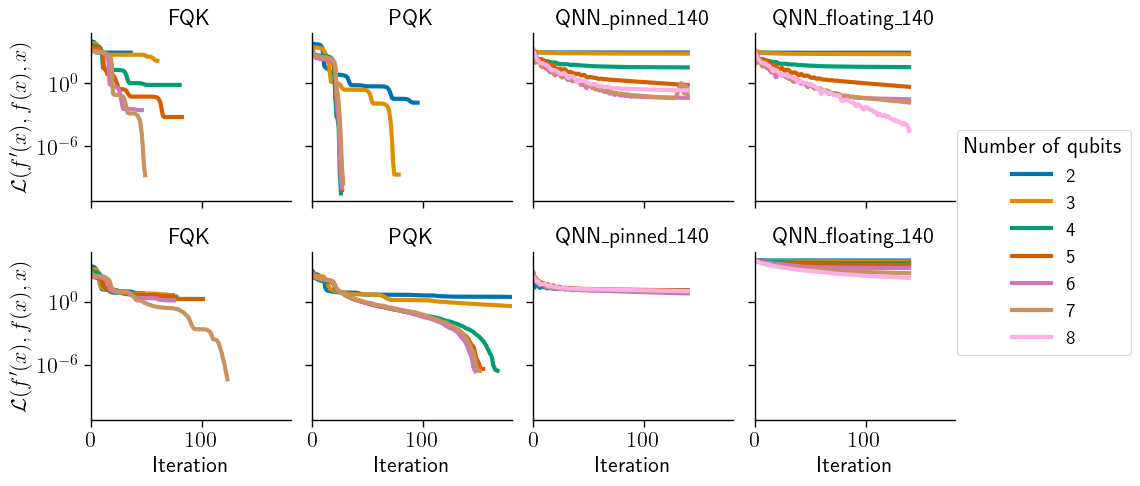

In [16]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})


palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=loss_history_str, 
                data=results,
                kind="line", 
                row="loss_name", 
                col="method",
                hue="Number of qubits",
                height=2.5,  # Adjust the height as needed
                aspect=1,  
                palette=palette,
                linewidth=3
                )

#include loss name in y axis

g.set_titles(" {col_name}")
g.set(yscale="log") 

leg = g._legend
leg.set_frame_on(True)

plt.xlim(0, 180)


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_19064\3786776819.py:13: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  g = sns.relplot(x="Iteration", y=mse_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future ver

(0.0, 180.0)

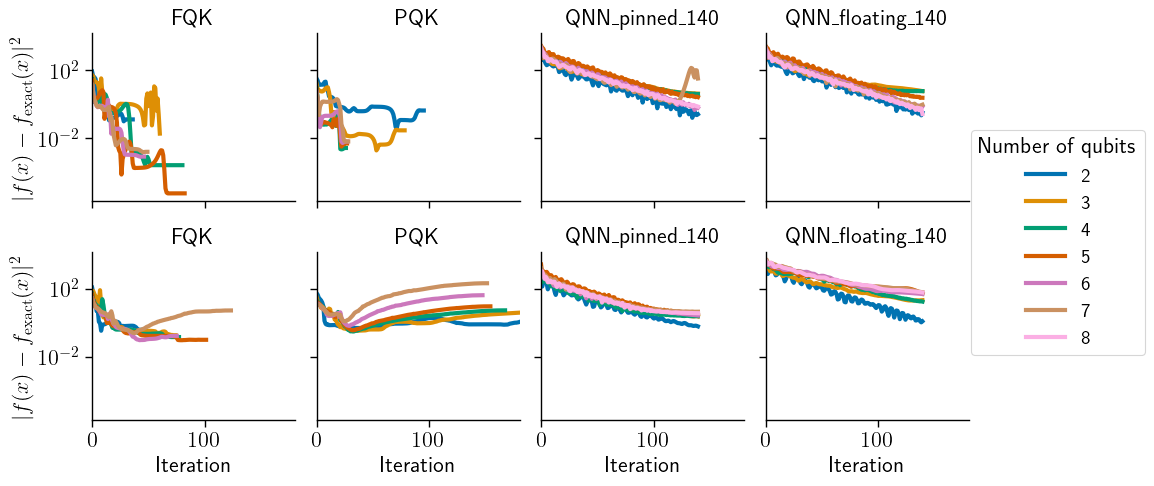

In [11]:
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})

palette = ListedColormap([f"C{i}" for i in range(10)])
palette = sns.color_palette("colorblind", 10)


#palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=mse_history_str, 
                data=results,
                kind="line", 
                row="loss_name", 
                col="method",
                hue="Number of qubits",
                height=2.5,  # Adjust the height as needed
                aspect=1,  
                palette=palette,
                linewidth=3
                )


g.set_titles("{col_name}")
g.set(yscale="log") 

leg = g._legend
leg.set_frame_on(True)

plt.xlim(0, 180)




In [9]:
results["min " + mse_history_str] = results.groupby(["method", "loss_name", "num_qubits"])["mse_history"].transform("min")
results["min " + loss_history_str] = results.groupby(["method", "loss_name", "num_qubits"])["loss_history"].transform("min")

mse_df = results[["method", "loss_name", "Number of qubits", "min " + mse_history_str]].drop_duplicates().rename(columns={"min " + mse_history_str: "min_loss"})
mse_df["Type of Loss"] = mse_history_str

true_loss_df = results[["method", "loss_name", "Number of qubits", "min " + loss_history_str]].drop_duplicates().rename(columns={"min " + loss_history_str: "min_loss"})
true_loss_df["Type of Loss"] = loss_history_str

combined_df = pd.concat([mse_df, true_loss_df])
#rename min_loss to Loss
combined_df = combined_df.rename(columns={"min_loss": "Loss"})
combined_df = combined_df.rename(columns={"method": "Method"})


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_19064\3123352887.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  g = sns.relplot(x="Number of qubits", y="Loss" ,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

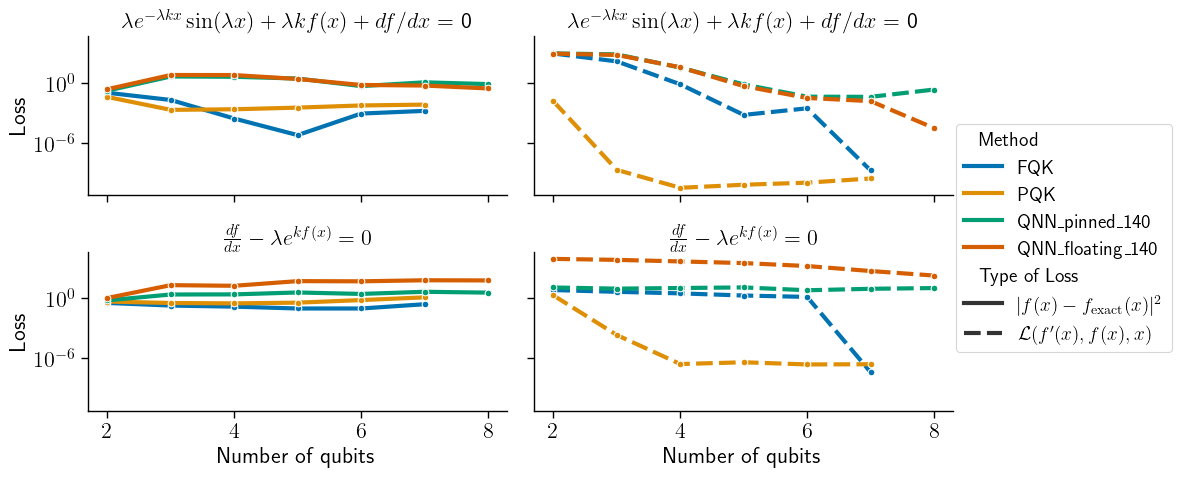

In [10]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

g = sns.relplot(x="Number of qubits", y="Loss" ,
                data=combined_df,
                kind="line", 
                row="loss_name", 
                col="Type of Loss",
                style="Type of Loss",
                hue="Method",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title
g.set_titles("{row_name}")
g.set(yscale="log")

leg = g._legend

leg.set_frame_on(True)

#export with 400 dpi
plt.savefig("./DE_0_30_comparison.png", dpi=400)

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_27872\2293138594.py:12: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  g = sns.relplot(x="Number of qubits", y="Loss" ,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before 

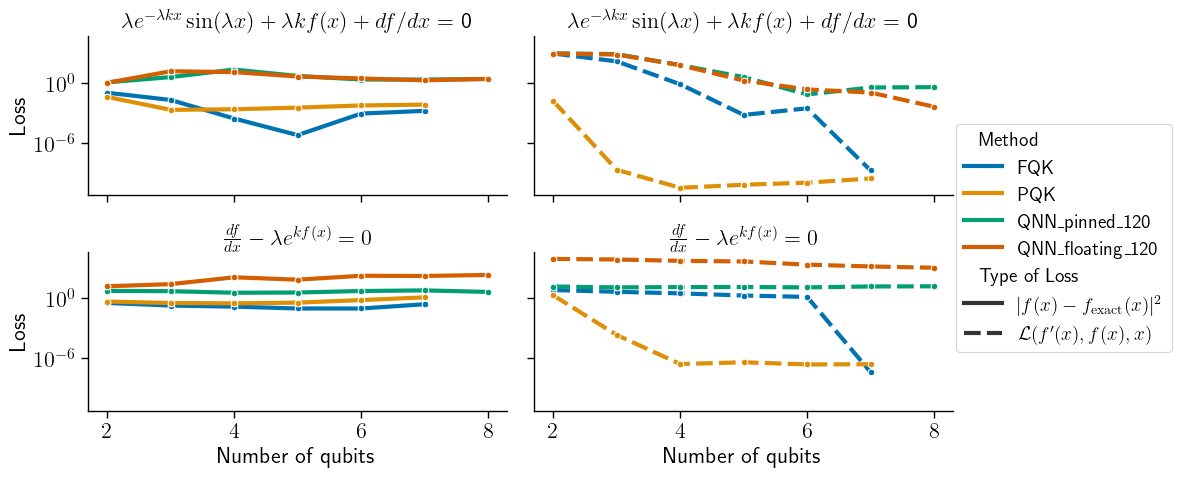

In [16]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits

##plt.legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#use this settings in sns
#include fancy box in set context
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})



g = sns.relplot(x="Number of qubits", y="Loss" ,
                data=combined_df,
                kind="line", 
                row="loss_name", 
                col="Type of Loss",
                style="Type of Loss",
                hue="Method",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title
g.set_titles("{row_name}")
g.set(yscale="log")
#g.set_xlabels("Number of qubits", fontsize=16)
#g.set_ylabels("Loss", fontsize=16)
#g.add_legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#g tick_params
#change g legend fontsize


leg = g._legend

leg.set_frame_on(True)
#leg set fancybox


#g.tick_params(labelsize=14)



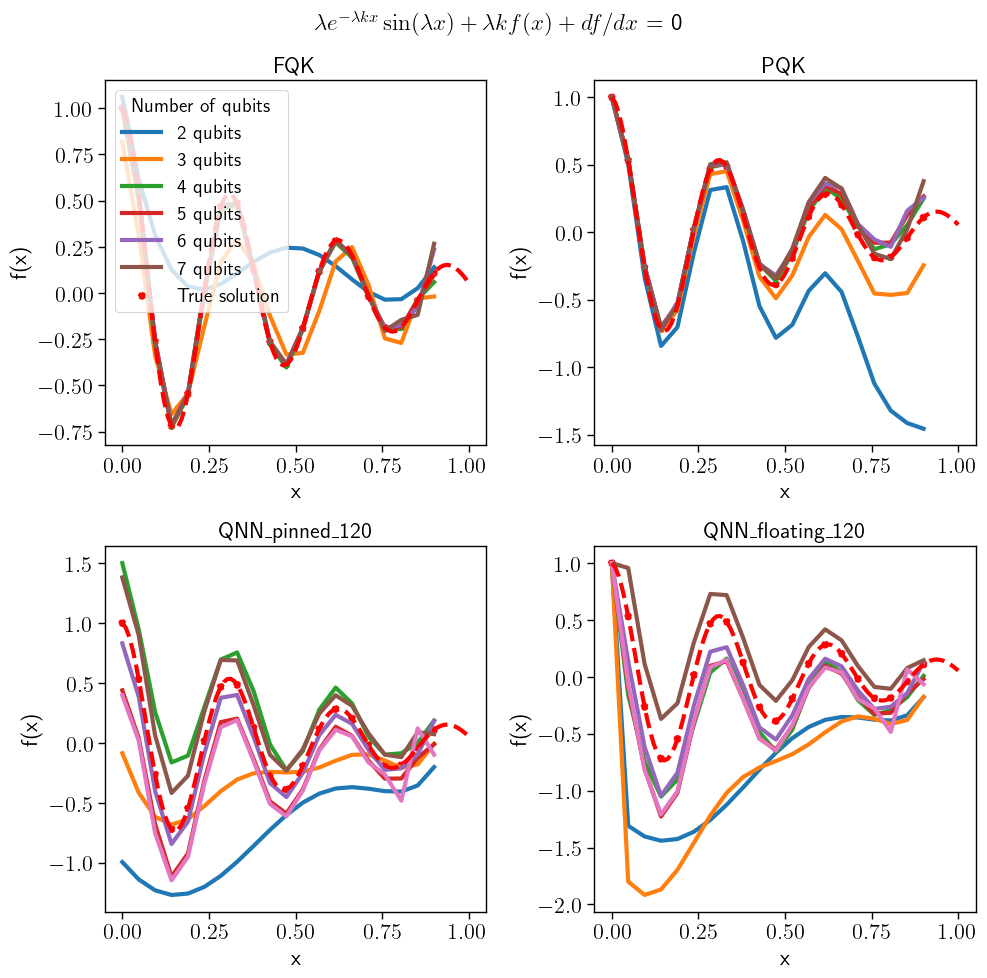

In [88]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits

##plt.legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#use this settings in sns
#include fancy box in set context
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})



fig, axs = plt.subplots(2, 2, figsize=(10, 10))

results_filtered = results[["domain", "f_sol", "num_qubits", "loss_name", "method"]]

index_pairs = [(0, 0), (0, 1), (1, 0), (1, 1)]
j = 0


f_initial = 1
true_sol = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, results_filtered["domain"].iloc[0])
true_sol_continous = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, np.linspace(0, 1, 100))



#suptitle
fig.suptitle(results_filtered["loss_name"].unique()[j])
for i in range(len(results_filtered["method"].unique())):
    ax = axs[index_pairs[i]]
    results_filtered_filtered = results_filtered[(results_filtered["method"] == results_filtered["method"].unique()[i]) & (results_filtered["loss_name"] == results_filtered["loss_name"].unique()[j])]
    #sort by number of qubits
    results_filtered_filtered = results_filtered_filtered.sort_values("num_qubits")
    for qubits in results_filtered_filtered["num_qubits"].unique():
        results_qb= results_filtered_filtered[results_filtered_filtered["num_qubits"] == qubits]
        ax.plot(results_qb["domain"].iloc[0], results_qb["f_sol"].iloc[0], label=str(qubits) + " qubits")
    ax.set_title(results_filtered["method"].unique()[i] )
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.scatter(results_filtered["domain"].iloc[0], true_sol, label="True solution", linestyle="--", color="red")
    ax.plot(np.linspace(0, 1, 100), true_sol_continous, linestyle="--", color="red")
    
    if i == 0:
        ax.legend(title="Number of qubits")

plt.tight_layout()



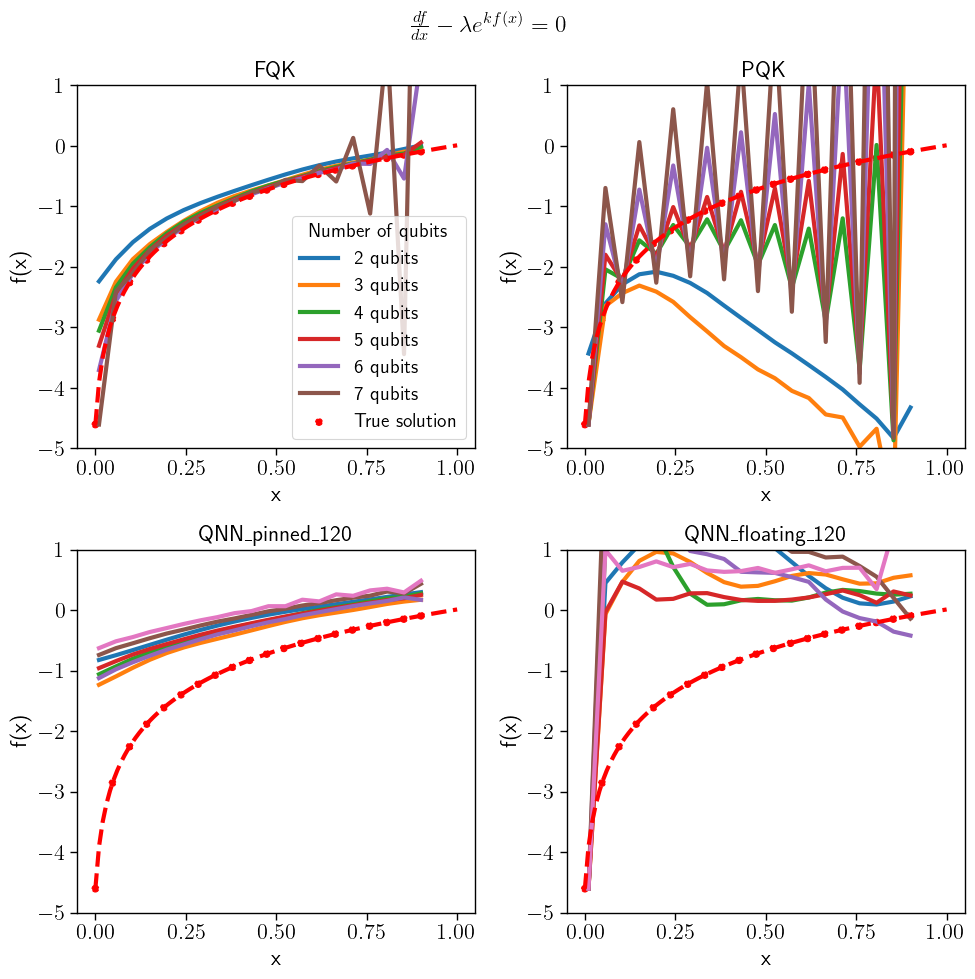

In [93]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits

##plt.legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#use this settings in sns
#include fancy box in set context
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})



fig, axs = plt.subplots(2, 2, figsize=(10, 10))

results_filtered = results[["domain", "f_sol", "num_qubits", "loss_name", "method"]]

index_pairs = [(0, 0), (0, 1), (1, 0), (1, 1)]
j = 1


f_initial = np.log(0.01)
true_sol = odeint(mapping_of_derivatives_of_loss_functions["log_ode"], f_initial, results_filtered["domain"].iloc[0])
true_sol_continous = odeint(mapping_of_derivatives_of_loss_functions["log_ode"], f_initial, np.linspace(0, 1, 100))



#suptitle
fig.suptitle(results_filtered["loss_name"].unique()[j])
for i in range(len(results_filtered["method"].unique())):
    ax = axs[index_pairs[i]]
    results_filtered_filtered = results_filtered[(results_filtered["method"] == results_filtered["method"].unique()[i]) & (results_filtered["loss_name"] == results_filtered["loss_name"].unique()[j])]
    #sort by number of qubits
    results_filtered_filtered = results_filtered_filtered.sort_values("num_qubits")
    for qubits in results_filtered_filtered["num_qubits"].unique():
        results_qb= results_filtered_filtered[results_filtered_filtered["num_qubits"] == qubits]
        ax.plot(results_qb["domain"].iloc[0], results_qb["f_sol"].iloc[0], label=str(qubits) + " qubits")
    ax.set_title(results_filtered["method"].unique()[i] )
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.scatter(results_filtered["domain"].iloc[0], true_sol, label="True solution", linestyle="--", color="red")
    ax.plot(np.linspace(0, 1, 100), true_sol_continous, linestyle="--", color="red")
    ax.set_ylim(-5, 1)
    if i == 0:
        ax.legend(title="Number of qubits")

plt.tight_layout()

